In [1]:
# Connect to data base
import mysql.connector as mysql
from mysql.connector import Error
try:
    db = mysql.connect(
        host = "localhost",
        database='mestradoNOTA',
        user = "root",
        passwd = "admin"
    )
    
    if db.is_connected():
        cursor = db.cursor(buffered=True)
#         cursor = db.cursor()
except Error as e:
    print("Error while connecting to MySQL", e)

In [22]:
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np

## Idade

In [ ]:
select_query = "select course, count(*) as COUNT from student_courses group by course;"

## Tipo de escola

In [11]:
#informações de matérias introdutorias
#select_query = "select school_type, count(*) as COUNT from students as St inner join student_course_subject as SCS on St.id = SCS.id_student inner join subjects as S on S.id = SCS.id_subject where (name = 'COMPUTACAO BASICA' or name = 'INTRODUCAO A CIENCIA DA COMPUTACAO' or name = 'ALGORITMOS E PROGRAMACAO DE COMPUTADORES') group by school_type;"

#informações gerais
select_query = "select school_type, count(*) as COUNT from students group by school_type;"

cursor.execute(select_query)
records = DataFrame(cursor.fetchall())
records.columns = cursor.column_names

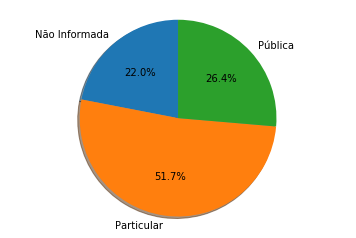

In [14]:
labels = records['school_type']
sizes = records['COUNT']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

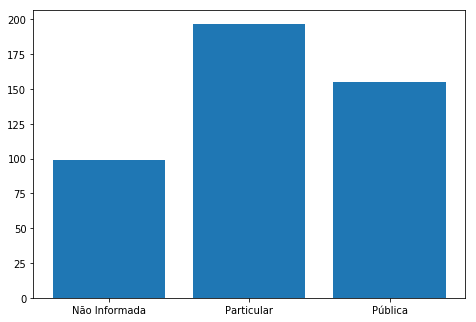

In [31]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = records['school_type']
students = records['COUNT']
ax.bar(langs,students)
plt.show()

In [16]:
select_query = "select school_type, semester_year, count(*) as COUNT from students as St inner join student_course_subject as SCS on St.id = SCS.id_student inner join subjects as S on S.id = SCS.id_subject where (name = 'COMPUTACAO BASICA' or name = 'INTRODUCAO A CIENCIA DA COMPUTACAO' or name = 'ALGORITMOS E PROGRAMACAO DE COMPUTADORES') group by school_type, semester_year;"

cursor.execute(select_query)
records = DataFrame(cursor.fetchall())
records.columns = cursor.column_names

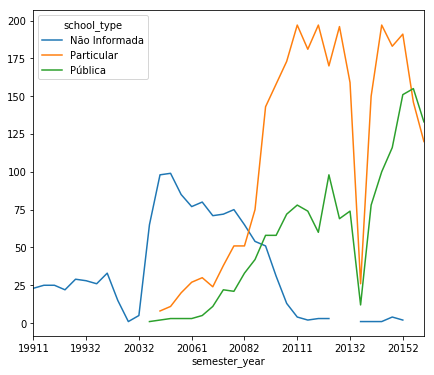

In [34]:
df = records.pivot(index='semester_year', columns='school_type', values='COUNT')
ax = df.plot(figsize=(7, 6))
# plt.plot(dataInt, records['COUNT'])
# plt.xlabel('Year')
# plt.ylabel('count')
# plt.show()

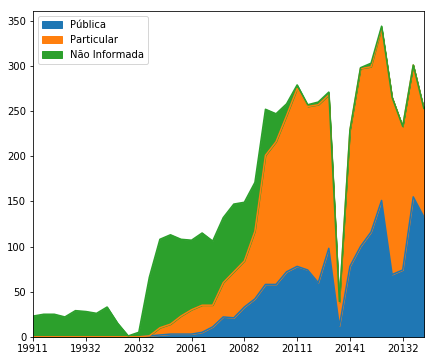

In [35]:
CIC = records[records['school_type'] == 'Pública']
LIC = records[records['school_type'] == 'Particular']
ERC = records[records['school_type'] == 'Não Informada']

semester_year = records['semester_year'].unique().tolist()
dt = DataFrame()

dt['semester_year'] = semester_year
dt['Pública'] = np.nan
dt['Particular'] = np.nan
dt['Não Informada'] = np.nan

for i in dt['semester_year']:
    if(i in CIC['semester_year'].values):
        value = CIC.loc[CIC['semester_year'] == i, 'COUNT']
        dt.loc[dt['semester_year'] == i, 'Pública'] = value.to_list()[0]
    if(i in LIC['semester_year'].values):
        value = LIC.loc[LIC['semester_year'] == i, 'COUNT']
        dt.loc[dt['semester_year'] == i, 'Particular'] = value.to_list()[0]
    if(i in ERC['semester_year'].values):
        dt.loc[dt['semester_year'] == i, 'Não Informada'] = ERC.loc[ERC['semester_year'] == i, 'COUNT'].to_list()

dt.index = semester_year
ax = dt.plot.area(figsize=(7, 6))

## Sexo

In [37]:
#informações de matérias introdutorias
#select_query = "select gender, count(*) as COUNT from students as St inner join student_course_subject as SCS on St.id = SCS.id_student inner join subjects as S on S.id = SCS.id_subject where (name = 'COMPUTACAO BASICA' or name = 'INTRODUCAO A CIENCIA DA COMPUTACAO' or name = 'ALGORITMOS E PROGRAMACAO DE COMPUTADORES') group by gender;"

#informações gerais
select_query = "select gender, count(*) as COUNT from students group by gender;"
cursor.execute(select_query)
records = DataFrame(cursor.fetchall())
records.columns = cursor.column_names

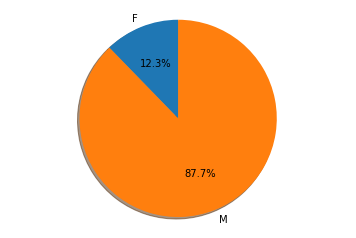

In [38]:
labels = records['gender']
sizes = records['COUNT']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

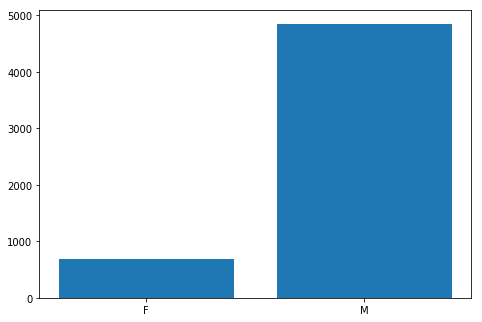

In [40]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = records['gender']
students = records['COUNT']
ax.bar(langs,students)
plt.show()

In [41]:
select_query = "select gender, semester_year, count(*) as COUNT from students as St inner join student_course_subject as SCS on St.id = SCS.id_student inner join subjects as S on S.id = SCS.id_subject where (name = 'COMPUTACAO BASICA' or name = 'INTRODUCAO A CIENCIA DA COMPUTACAO' or name = 'ALGORITMOS E PROGRAMACAO DE COMPUTADORES') group by gender, semester_year;"

cursor.execute(select_query)
records = DataFrame(cursor.fetchall())
records.columns = cursor.column_names

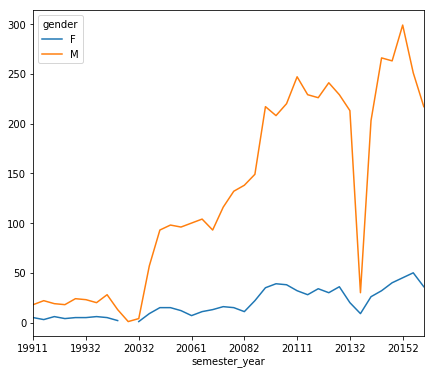

In [44]:
df = records.pivot(index='semester_year', columns='gender', values='COUNT')
ax = df.plot(figsize=(7, 6))
# plt.plot(dataInt, records['COUNT'])
# plt.xlabel('Year')
# plt.ylabel('count')
# plt.show()

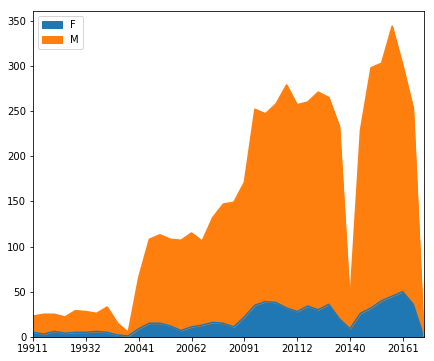

In [45]:
CIC = records[records['gender'] == 'F']
LIC = records[records['gender'] == 'M']

semester_year = records['semester_year'].unique().tolist()
dt = DataFrame()

dt['semester_year'] = semester_year
dt['F'] = np.nan
dt['M'] = np.nan


for i in dt['semester_year']:
    if(i in CIC['semester_year'].values):
        value = CIC.loc[CIC['semester_year'] == i, 'COUNT']
        dt.loc[dt['semester_year'] == i, 'F'] = value.to_list()[0]
    if(i in LIC['semester_year'].values):
        value = LIC.loc[LIC['semester_year'] == i, 'COUNT']
        dt.loc[dt['semester_year'] == i, 'M'] = value.to_list()[0]
dt.index = semester_year
ax = dt.plot.area(figsize=(7, 6))

## Cotista

In [46]:
#informações de matérias introdutorias
#select_query = "select quotaholder, count(*) as COUNT from students as St inner join student_course_subject as SCS on St.id = SCS.id_student inner join subjects as S on S.id = SCS.id_subject where (name = 'COMPUTACAO BASICA' or name = 'INTRODUCAO A CIENCIA DA COMPUTACAO' or name = 'ALGORITMOS E PROGRAMACAO DE COMPUTADORES') group by quotaholder;"

#informações gerais
select_query = "select quotaholder, count(*) as COUNT from students group by quotaholder;"

cursor.execute(select_query)
records = DataFrame(cursor.fetchall())
records.columns = cursor.column_names

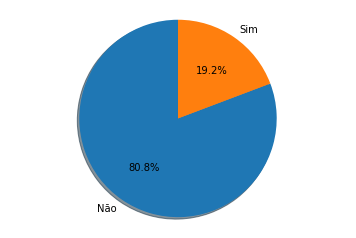

In [47]:
labels = records['quotaholder']
sizes = records['COUNT']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

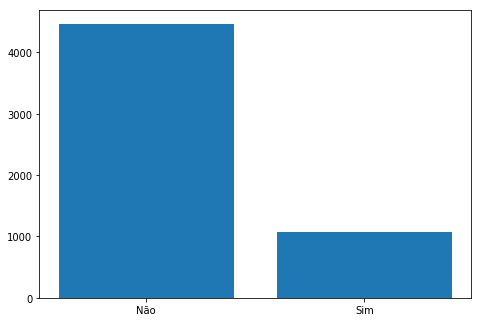

In [48]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = records['quotaholder']
students = records['COUNT']
ax.bar(langs,students)
plt.show()

In [51]:
select_query = "select quotaholder, semester_year, count(*) as COUNT from students as St inner join student_course_subject as SCS on St.id = SCS.id_student inner join subjects as S on S.id = SCS.id_subject where (name = 'COMPUTACAO BASICA' or name = 'INTRODUCAO A CIENCIA DA COMPUTACAO' or name = 'ALGORITMOS E PROGRAMACAO DE COMPUTADORES') group by quotaholder, semester_year;"

cursor.execute(select_query)
records = DataFrame(cursor.fetchall())
records.columns = cursor.column_names

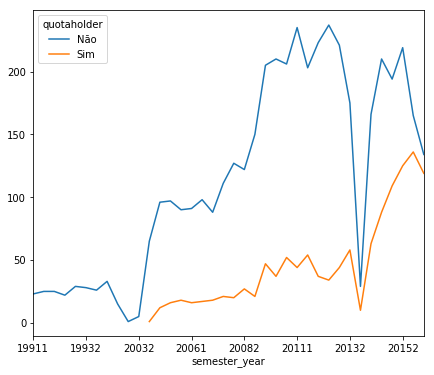

In [52]:
df = records.pivot(index='semester_year', columns='quotaholder', values='COUNT')
ax = df.plot(figsize=(7, 6))
# plt.plot(dataInt, records['COUNT'])
# plt.xlabel('Year')
# plt.ylabel('count')
# plt.show()

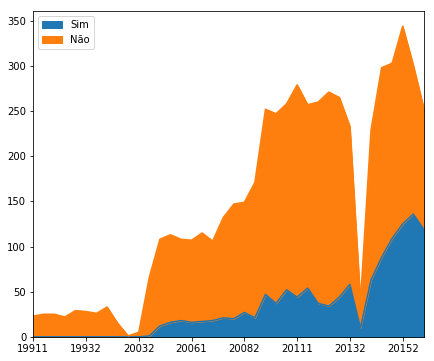

In [56]:
CIC = records[records['quotaholder'] == 'Sim']
LIC = records[records['quotaholder'] == 'Não']

semester_year = records['semester_year'].unique().tolist()
dt = DataFrame()

dt['semester_year'] = semester_year
dt['Sim'] = np.nan
dt['Não'] = np.nan


for i in dt['semester_year']:
    if(i in CIC['semester_year'].values):
        value = CIC.loc[CIC['semester_year'] == i, 'COUNT']
        dt.loc[dt['semester_year'] == i, 'Sim'] = value.to_list()[0]
    if(i in LIC['semester_year'].values):
        value = LIC.loc[LIC['semester_year'] == i, 'COUNT']
        dt.loc[dt['semester_year'] == i, 'Não'] = value.to_list()[0]
dt.index = semester_year
ax = dt.plot.area(figsize=(7, 6))

## Raça

In [82]:
#informações de matérias introdutorias
#select_query = "select quotaholder, count(*) as COUNT from students as St inner join student_course_subject as SCS on St.id = SCS.id_student inner join subjects as S on S.id = SCS.id_subject where (name = 'COMPUTACAO BASICA' or name = 'INTRODUCAO A CIENCIA DA COMPUTACAO' or name = 'ALGORITMOS E PROGRAMACAO DE COMPUTADORES') group by quotaholder;"

#informações gerais
select_query = "select      CASE     WHEN race = 'Nao cadastrada' THEN 'Nao informado'      WHEN race = 'Nao dispe da informao' THEN 'Nao informado'  ELSE race      END as newRace, count(*) as COUNT from students group by newrace;"

cursor.execute(select_query)
records = DataFrame(cursor.fetchall())
records.columns = cursor.column_names

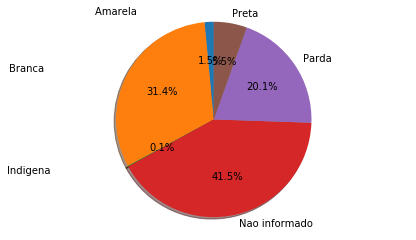

In [83]:
labels = records['newRace']
sizes = records['COUNT']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

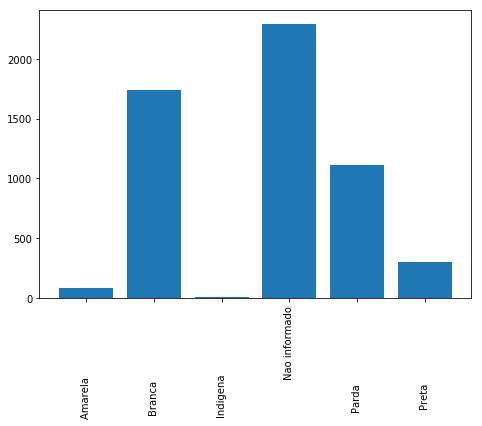

In [84]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = records['newRace']
students = records['COUNT']
ax.bar(langs,students)
plt.xticks(rotation=90)
plt.show()

In [72]:
select_query = "select      CASE     WHEN race = 'Nao cadastrada' THEN 'Nao informado'      WHEN race = 'Nao dispe da informao' THEN 'Nao informado'  ELSE race      END as newRace, count(*) as COUNT, semester_year from students as St inner join student_course_subject as SCS on St.id = SCS.id_student inner join subjects as S on S.id = SCS.id_subject where (name = 'COMPUTACAO BASICA' or name = 'INTRODUCAO A CIENCIA DA COMPUTACAO' or name = 'ALGORITMOS E PROGRAMACAO DE COMPUTADORES') group by newRace, semester_year;"

cursor.execute(select_query)
records = DataFrame(cursor.fetchall())
records.columns = cursor.column_names

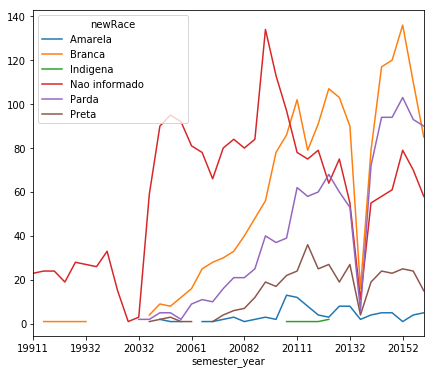

In [73]:
df = records.pivot(index='semester_year', columns='newRace', values='COUNT')
ax = df.plot(figsize=(7, 6))
# plt.plot(dataInt, records['COUNT'])
# plt.xlabel('Year')
# plt.ylabel('count')
# plt.show()

In [76]:
# A = records[records['newRace'] == 'Amarela']
# B = records[records['newRace'] == 'Branca']
# I = records[records['newRace'] == 'Indigena']
# NI = records[records['newRace'] == 'Nao informado']
# PA = records[records['newRace'] == 'Parda']
# PR = records[records['newRace'] == 'Preta']

# semester_year = records['semester_year'].unique().tolist()
# dt = DataFrame()

# dt['semester_year'] = semester_year
# dt['Amarela'] = np.nan
# dt['Branca'] = np.nan
# dt['Indigena'] = np.nan
# dt['Nao informado'] = np.nan
# dt['Parda'] = np.nan
# dt['Preta'] = np.nan


# for i in dt['semester_year']:
#     if(i in A['semester_year'].values):
#         value = A.loc[A['semester_year'] == i, 'COUNT']
#         dt.loc[dt['semester_year'] == i, 'Amarela'] = value.to_list()[0]
#     if(i in B['semester_year'].values):
#         value = B.loc[B['semester_year'] == i, 'COUNT']
#         dt.loc[dt['semester_year'] == i, 'Branca'] = value.to_list()[0]
#     if(i in I['semester_year'].values):
#         value = I.loc[I['semester_year'] == i, 'COUNT']
#         dt.loc[dt['semester_year'] == i, 'Indigena'] = value.to_list()[0]
#     if(i in NI['semester_year'].values):
#         value = NI.loc[NI['semester_year'] == i, 'COUNT']
#         dt.loc[dt['semester_year'] == i, 'Nao informado'] = value.to_list()[0]
#     if(i in PA['semester_year'].values):
#         value = PA.loc[PA['semester_year'] == i, 'COUNT']
#         dt.loc[dt['semester_year'] == i, 'Parda'] = value.to_list()[0]
#     if(i in PR['semester_year'].values):
#         value = PR.loc[PR['semester_year'] == i, 'COUNT']
#         dt.loc[dt['semester_year'] == i, 'Preta'] = value.to_list()[0]
# dt.index = semester_year
# ax = dt.plot.area(figsize=(7, 6))

## Cursos

In [85]:
#informações gerais
select_query = "select course, count(*) as COUNT from student_courses group by course;"

cursor.execute(select_query)
records = DataFrame(cursor.fetchall())
records.columns = cursor.column_names

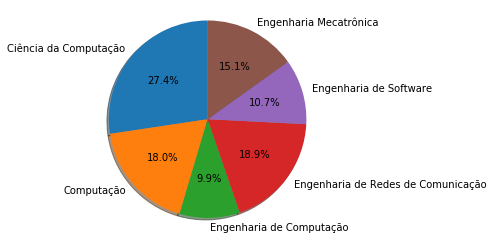

In [86]:
labels = records['course']
sizes = records['COUNT']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

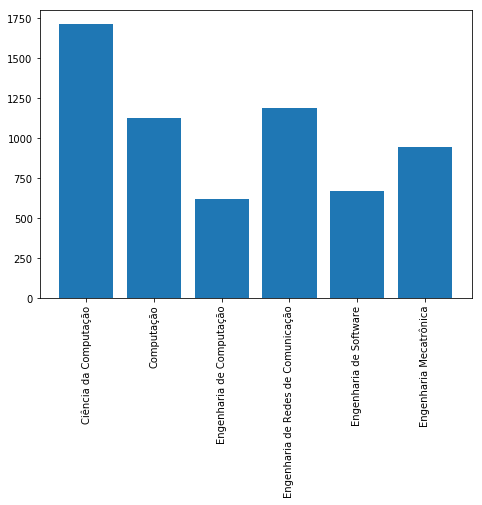

In [87]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = records['course']
students = records['COUNT']
ax.bar(langs,students)
plt.xticks(rotation=90)
plt.show()

In [93]:
select_query = "select course, count(*) as COUNT, semester_year from student_courses as SC inner join student_course_subject as SCS on SC.id = SCS.id_student_course inner join subjects as S on S.id = SCS.id_subject where (name = 'COMPUTACAO BASICA' or name = 'INTRODUCAO A CIENCIA DA COMPUTACAO' or name = 'ALGORITMOS E PROGRAMACAO DE COMPUTADORES') group by course, semester_year;"

cursor.execute(select_query)
records = DataFrame(cursor.fetchall())
records.columns = cursor.column_names

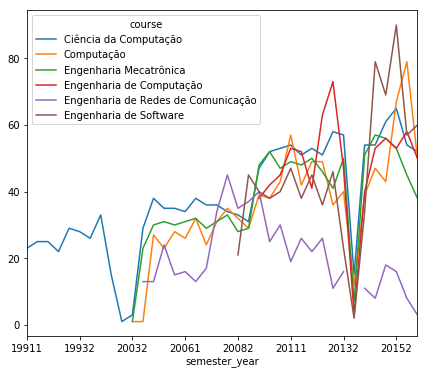

In [94]:
df = records.pivot(index='semester_year', columns='course', values='COUNT')
ax = df.plot(figsize=(7, 6))
# plt.plot(dataInt, records['COUNT'])
# plt.xlabel('Year')
# plt.ylabel('count')
# plt.show()

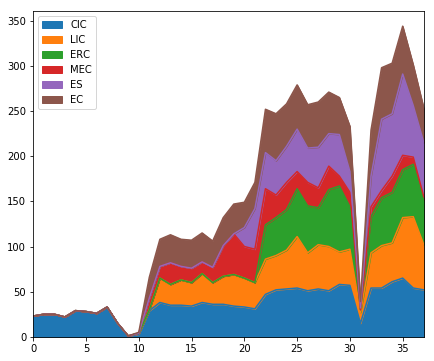

In [98]:

courses = records['course'].unique().tolist()

CIC = records[records['course'] == courses[0]]
LIC = records[records['course'] == courses[1]]
ERC = records[records['course'] == courses[2]]
MEC = records[records['course'] == courses[3]]
ES = records[records['course'] == courses[4]]
EC = records[records['course'] == courses[5]]

semester_year = records['semester_year'].unique().tolist()
dt = DataFrame()

dt['semester_year'] = semester_year
dt['CIC'] = np.nan
dt['LIC'] = np.nan
dt['ERC'] = np.nan
dt['MEC'] = np.nan
dt['ES'] = np.nan
dt['EC'] = np.nan

for i in dt['semester_year']:
    if(i in CIC['semester_year'].values):
        value = CIC.loc[CIC['semester_year'] == i, 'COUNT']
        dt.loc[dt['semester_year'] == i, 'CIC'] = value.to_list()[0]
    if(i in LIC['semester_year'].values):
        value = LIC.loc[LIC['semester_year'] == i, 'COUNT']
        dt.loc[dt['semester_year'] == i, 'LIC'] = value.to_list()[0]
    if(i in ERC['semester_year'].values):
        dt.loc[dt['semester_year'] == i, 'ERC'] = ERC.loc[ERC['semester_year'] == i, 'COUNT'].to_list()[0]
    if(i in MEC['semester_year'].values):
        dt.loc[dt['semester_year'] == i, 'MEC'] = MEC.loc[MEC['semester_year'] == i, 'COUNT'].to_list()[0]
    if(i in ES['semester_year'].values):
        dt.loc[dt['semester_year'] == i, 'ES'] = ES.loc[ES['semester_year'] == i, 'COUNT'].to_list()[0]
    if(i in EC['semester_year'].values):
        dt.loc[dt['semester_year'] == i, 'EC'] = EC.loc[EC['semester_year'] == i, 'COUNT'].to_list()[0]

        
ax = dt.plot.area(figsize=(7, 6))